In [41]:
# import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [42]:
df = pd.read_csv(r'https://raw.githubusercontent.com/Ciarzi/DP3_GP1/main/datasets/own_data/train.csv')
df_perf_test, target = df.drop(['flag'],axis=1), df[['flag']]
df_perf_test.head()

,loannumber,historial,referido,age,due_per_day,interes,cuenta_corriente,cuenta_otra,cuenta_ahorro,pib_capita,employment
0,12,0,1,50,1150,15.00,0,1,0,2065,2
1,7,1,1,37,1483,11.25,0,1,0,641,2
2,3,0,1,44,766,15.00,0,0,1,1632,2
3,9,1,1,35,1466,10.00,0,1,0,2201,2
4,8,1,1,49,650,30.00,0,0,1,2065,2


In [43]:
df_perf_test.drop(columns = ['flag'], inplace = True)
df_perf_test.shape

KeyError: "['flag'] not found in axis"

ELBOW

In [31]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_perf_test)
    distortions.append(kmeanModel.inertia_)

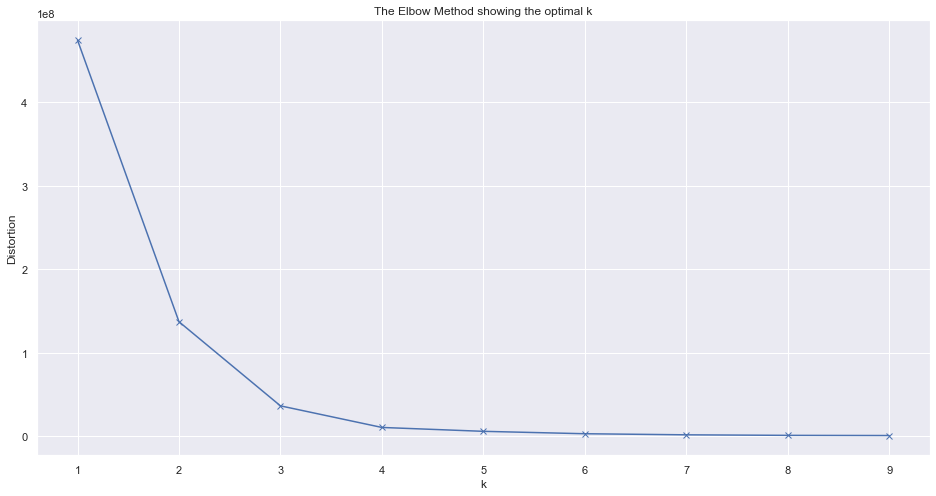

In [32]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

KMEANS

In [33]:
clustering =  KMeans(n_clusters = 3, max_iter = 300)#Crea el modelo
clustering.fit(df_perf_test)

KMeans(n_clusters=3)

CLASIFICACION EN EL ARCHIVO

In [34]:
df['Kmeans_Cluster']=clustering.labels_
df.head()

,loannumber,historial,referido,flag,age,due_per_day,interes,cuenta_corriente,cuenta_otra,cuenta_ahorro,pib_capita,employment,Kmeans_Cluster
0,12,0,1,1,50,1150,15.00,0,1,0,2065,2,0
1,7,1,1,1,37,1483,11.25,0,1,0,641,2,0
2,3,0,1,1,44,766,15.00,0,0,1,1632,2,2
3,9,1,1,1,35,1466,10.00,0,1,0,2201,2,0
4,8,1,1,1,49,650,30.00,0,0,1,2065,2,2


In [35]:
df.to_csv(r'../datasets/own_data/cluster_train.csv',index=False)

VISUALIZACION

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_mt_cl = pca.fit_transform(df_perf_test)
pca_mt_cl_df = pd.DataFrame(data=pca_mt_cl, columns = ['Componente_1', 'Componente_2'])
pca_nombres_mt = pd.concat([pca_mt_cl_df, df[['Kmeans_Cluster']]], axis=1)

pca_nombres_mt

,Componente_1,Componente_2,Kmeans_Cluster
0,406.513055,12.664681,0
1,739.476644,0.035384,0
2,22.531835,6.030214,2
3,722.518918,-2.130209,0
4,-93.701813,12.274551,2
...,...,...,...
4353,-310.697873,5.923744,1
4354,-310.699245,-5.004502,1
4355,22.530102,-5.906060,2
4356,-310.699791,-5.993071,1


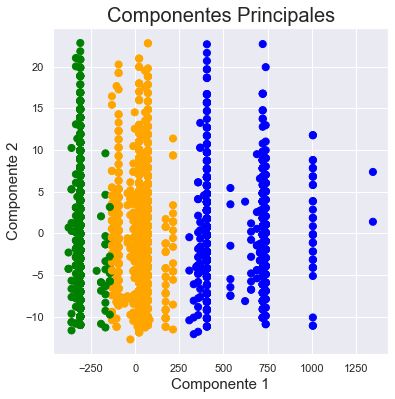

In [37]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20)

color_theme = np.array(["blue", "green", "orange"])
ax.scatter(x = pca_nombres_mt.Componente_1, y = pca_nombres_mt.Componente_2,
          c=color_theme[pca_nombres_mt.Kmeans_Cluster], s = 50)
plt.show()